In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import json

with open('/content/intents1.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hello, Good morning, Good afternoon, Good...",[Hello! How can I assist you with your finance...
1,investment_advice,"[What are the best investments?, Where should ...",[The best investment depends on your financial...
2,budgeting,"[How do I create a budget?, Help me with budge...","[To create a budget, list your income and expe..."
3,retirement_planning,"[How much should I save for retirement?, When ...",[It's never too early to start saving for reti...
4,tax_saving,"[How can I save on taxes?, What are the best t...",[You can save on taxes through retirement acco...
5,loan_advice,"[Should I take a loan?, What are the best loan...",[The decision to take a loan depends on your f...
6,credit_score,"[How can I improve my credit score?, What affe...","[To improve your credit score, pay your bills ..."
7,financial_goals,"[How should I set financial goals?, Help me se...","[Start by defining short, medium, and long-ter..."
8,emergency_fund,"[How much should I save in an emergency fund?,...",[An emergency fund should cover 3 to 6 months ...
9,insurance_advice,"[What type of insurance should I get?, Do I ne...","[Life, health, and auto insurance are essentia..."


In [ ]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello! How can I assist you with your finance...
1,greeting,Hello,[Hello! How can I assist you with your finance...
2,greeting,Good morning,[Hello! How can I assist you with your finance...
3,greeting,Good afternoon,[Hello! How can I assist you with your finance...
4,greeting,Good evening,[Hello! How can I assist you with your finance...
...,...,...,...
99,goodbye,Talk to you later,[Goodbye! Feel free to reach out anytime you n...
100,goodbye,"Thanks, bye",[Goodbye! Feel free to reach out anytime you n...
101,default,I need help with money,"[I can help with budgeting, investments, insur..."
102,default,Can you give me financial advice?,"[I can help with budgeting, investments, insur..."


In [ ]:
df['tag'].unique()

array(['greeting', 'investment_advice', 'budgeting',
       'retirement_planning', 'tax_saving', 'loan_advice', 'credit_score',
       'financial_goals', 'emergency_fund', 'insurance_advice',
       'health_insurance', 'life_insurance', 'auto_insurance',
       'disability_insurance', 'home_insurance', 'savings_plan',
       'investment_risk', 'financial_advisor', 'retirement_accounts',
       'pension', 'retirement_calculator', 'estate_planning',
       'tax_planning', 'college_savings', 'financial_aid',
       'loan_consolidation', 'student_loans', 'debt_management',
       'credit_cards', 'goodbye', 'default'], dtype=object)

# Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 104,
 'word_counts': '{"hi": 1, "hello": 1, "good": 6, "morning": 1, "afternoon": 1, "evening": 1, "hey": 1, "what": 28, "are": 5, "the": 8, "best": 8, "investments": 1, "where": 1, "should": 14, "i": 41, "invest": 1, "my": 9, "money": 5, "investment": 3, "options": 3, "tell": 2, "me": 13, "about": 2, "opportunities": 1, "how": 27, "do": 22, "create": 2, "a": 17, "budget": 3, "help": 13, "with": 7, "budgeting": 1, "is": 20, "way": 1, "to": 7, "plan": 6, "much": 5, "save": 7, "for": 6, "retirement": 7, "when": 2, "start": 1, "saving": 2, "can": 11, "on": 1, "taxes": 2, "tax": 4, "planning": 4, "take": 4, "loan": 6, "manage": 3, "loans": 4, "it": 1, "personal": 1, "improve": 2, "credit": 6, "score": 3, "affects": 1, "set": 2, "financial": 10, "goals": 3, "prioritize": 1, "in": 1, "an": 6, "emergency": 3, "fund": 3, "why": 1, "

In [ ]:
vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

number of unique words =  127


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

X shape =  (104, 9)
y shape =  (104,)
num of classes =  31


# Build and Train Model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 9, 100)              │          12,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 9, 32)               │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 9, 32)               │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 9, 32)               │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 9, 32)               │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 31)                  │           3,999 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,903 (280.87 KB)

 Trainable params: 71,903 (280.87 KB)

 Non-trainable params: 0 (0.00 B)

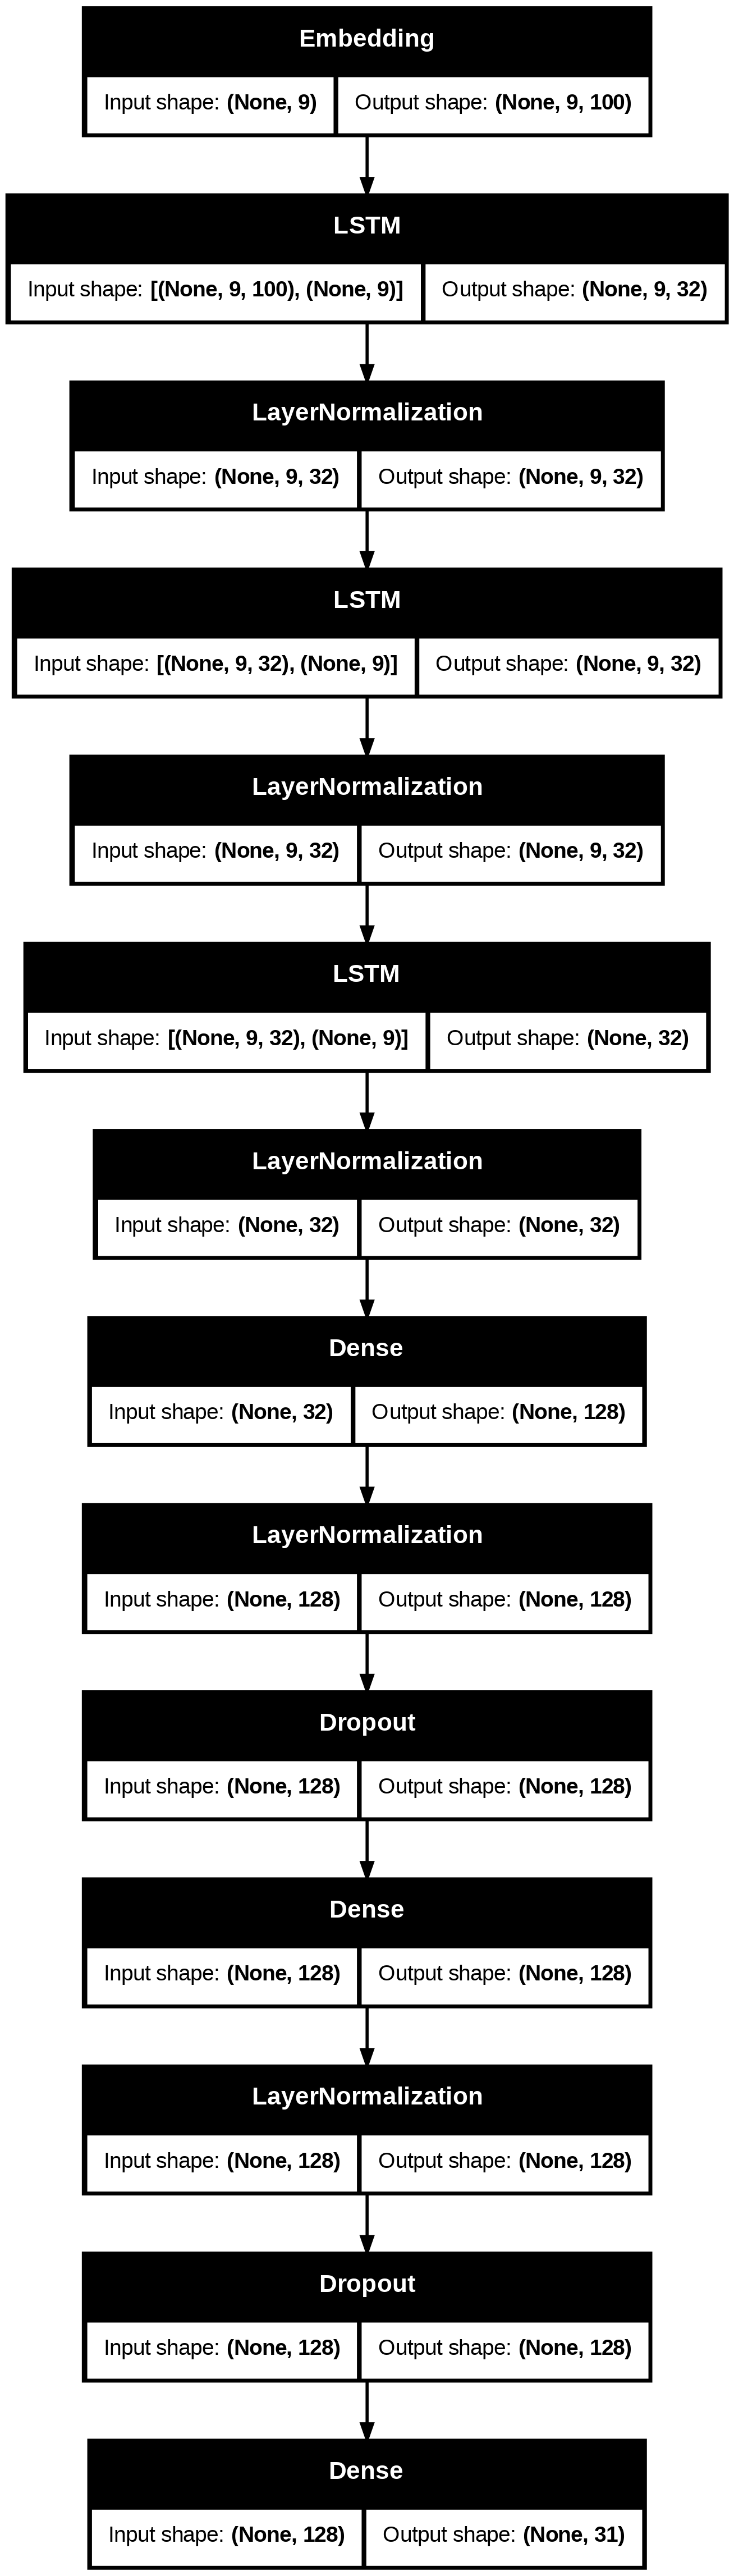

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [ ]:
model_history = model.fit(x=X,
                          y=y,
                          batch_size=10,
                          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],
                          epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.0620 - loss: 4.2024
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0962 - loss: 3.5394
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1920 - loss: 2.9422
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2637 - loss: 2.4893
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4303 - loss: 1.8736
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5487 - loss: 1.7007
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6688 - loss: 1.4368
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6693 - loss: 1.2420
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7256 - loss: 1.0403
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8143 - loss: 0.8583
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8789 - loss: 0.7878
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/ste

In [ ]:
import re
import random

In [ ]:
def generate_answer(pattern):
    # Tokenize and preprocess the input pattern
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    # Convert the input pattern to sequence and make prediction
    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]

    # Get the corresponding responses for the predicted tag
    responses = df[df['tag'] == tag]['responses'].values[0]

    # Print the input pattern and a random response
    print("you: {}".format(pattern))
    print("model: {}".format(random.choice(responses)))

# Keep asking for input until the user types "goodbye" or "bye"
while True:
    pattern = input("You: ")
    if pattern.lower() in ['goodbye', 'bye']:
        print("Chatbot: Goodbye! Have a great day!")
        break
    else:
        generate_answer(pattern)


You: What are the best investments?
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
you: What are the best investments?
model: The best investment depends on your financial goals. Some options include stocks, bonds, mutual funds, or real estate. Do you have a risk preference?
You: good bye
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
you: good bye
model: Hi! How can I help you manage your money?
You: goodbye
Chatbot: Goodbye! Have a great day!


In [ ]:
model.save('chatbot_model1.h5')